# Loading Dataset

In [1]:
import pandas as pd 

addr = "winequality-white.csv"
wineq = pd.read_csv(addr, delimiter=';')

wineq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Description

In [2]:
wineq.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Finding Null Values

In [3]:
print(wineq.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Data Analysis
**Using Matplotlib and seanborn**

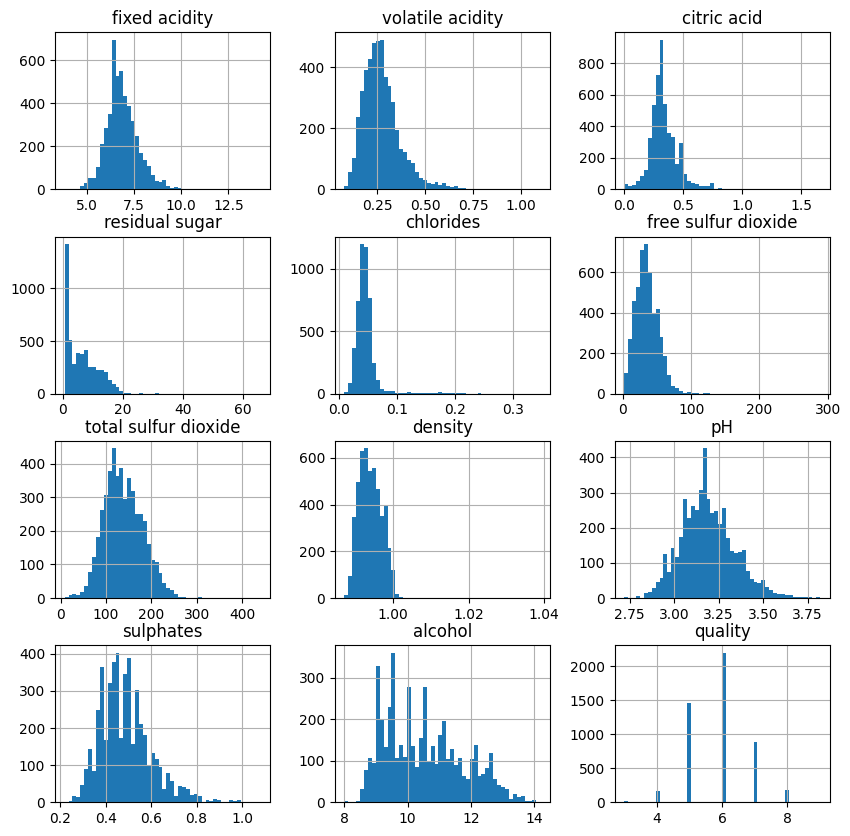

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histogram
wineq.hist(figsize=(10,10),bins=50)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

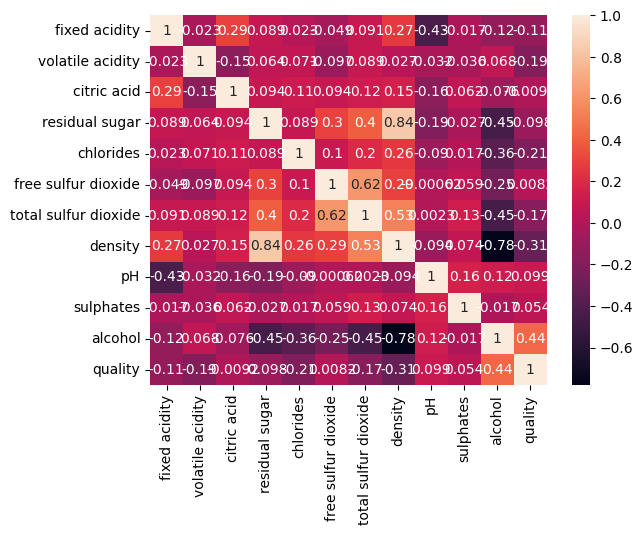

In [5]:
#Correlation
corr = wineq.corr()
sns.heatmap(corr,annot=True)
plt.show

# Feature Selection

In [6]:
import numpy as np

#Creating Class for dataset
wineq['goodquality'] = [1 if x >= 7 else 0 for x in wineq['quality']]

feature = wineq.drop(["quality",'goodquality'], axis=1).values
target = wineq["goodquality"].values.reshape(-1)
np.shape(target)

(4898,)

# Splitting Dataset

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

# LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(x_train,y_train)
LG_pre = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
LG_accuracy = accuracy_score(y_test,LG_pre)
print("Accuracy Score:",LG_accuracy)

confusion_mat = confusion_matrix(y_test,LG_pre)
print(confusion_mat)

Accuracy Score: 0.7857142857142857
[[713  40]
 [170  57]]


# Using KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
KN_pred = model1.predict(x_test)

KN_accuracy = accuracy_score(y_test,KN_pred)
print("Accuracy Score:",KN_accuracy)

Accuracy Score: 0.7887755102040817


# Using SVM

In [10]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train,y_train)
SVS_pred = model2.predict(x_test)

SVM_accuracy = accuracy_score(y_test,SVS_pred)
print("Accuracy Score:",accuracy_score(y_test,SVS_pred))

Accuracy Score: 0.7683673469387755


# Using RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=1)
model3.fit(x_train, y_train)
y_pred2 = model3.predict(x_test)

RF_accuracy = accuracy_score(y_test,y_pred2)
print("Accuracy Score:",RF_accuracy)

Accuracy Score: 0.889795918367347


# CONCOLUSION

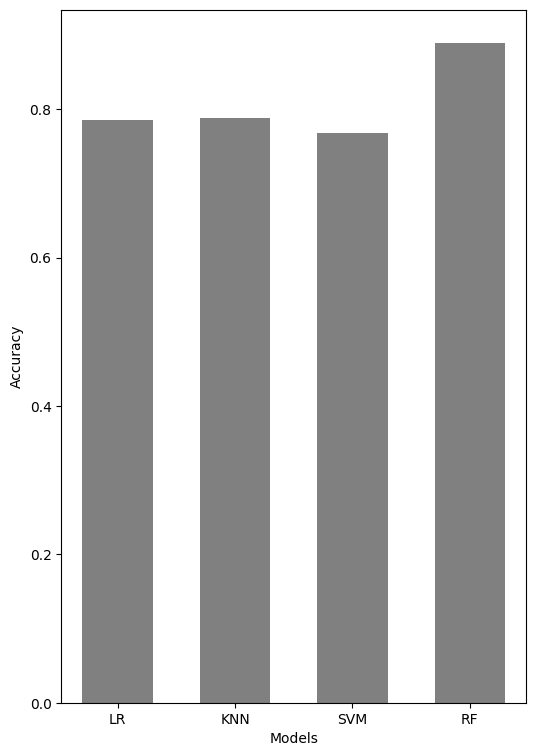

In [32]:
courses = ["LR", "KNN", "SVM", "RF"]
values = [LG_accuracy,KN_accuracy,SVM_accuracy,RF_accuracy]
  
fig = plt.figure(figsize = (6, 9))
 
# creating the bar plot
plt.bar(courses, values, color ='grey',
        width = 0.6)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()